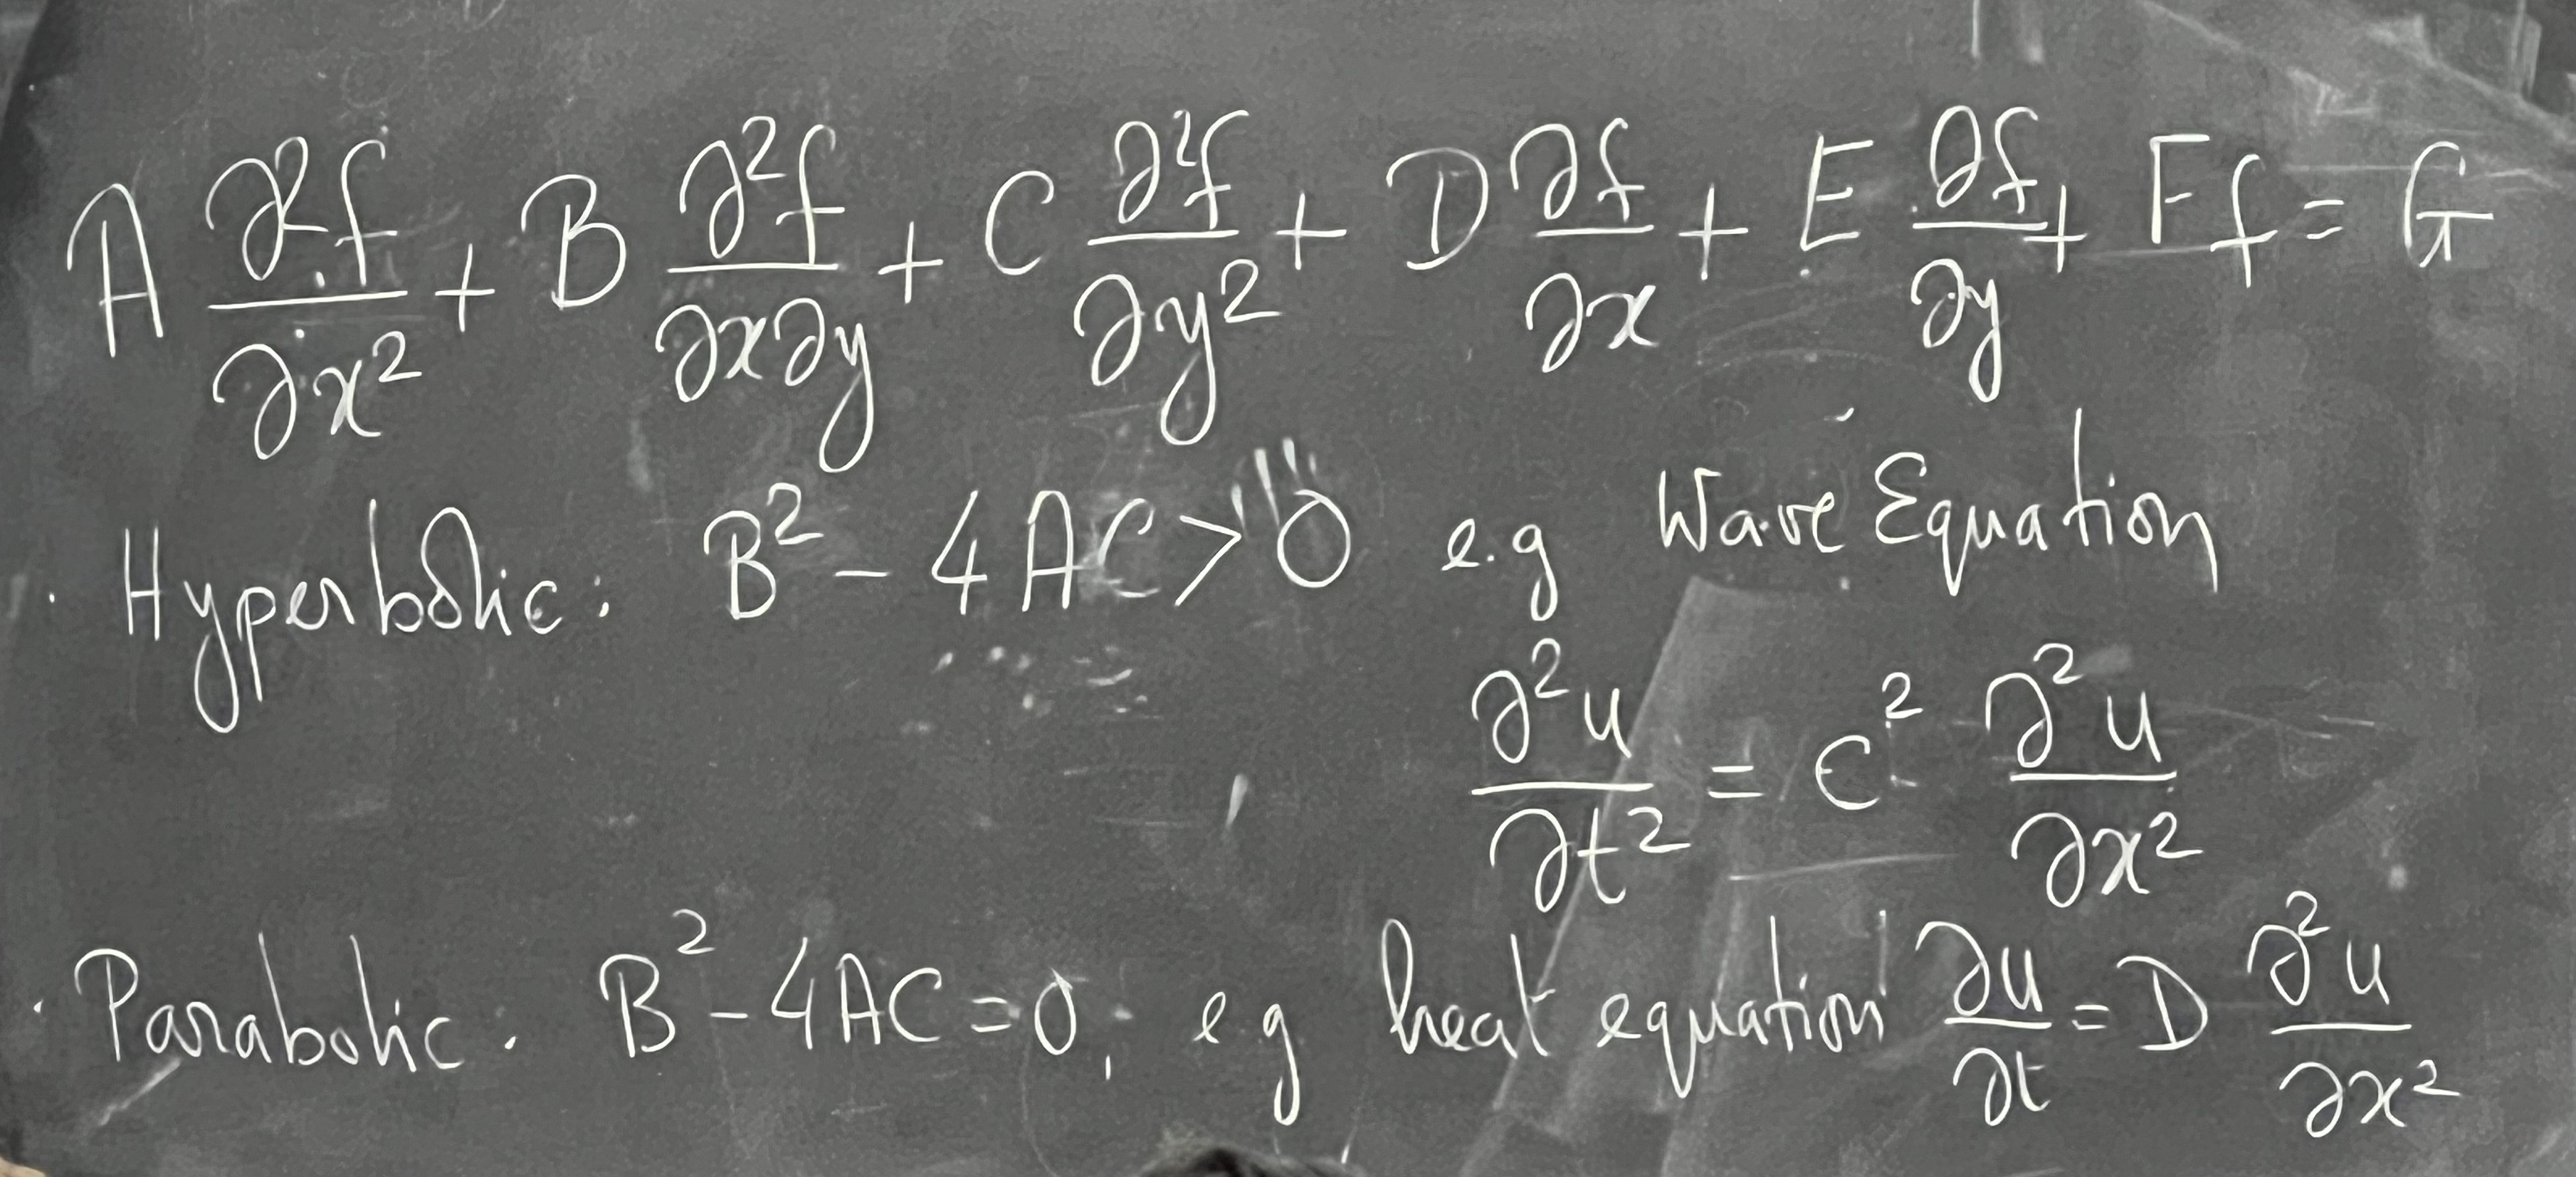

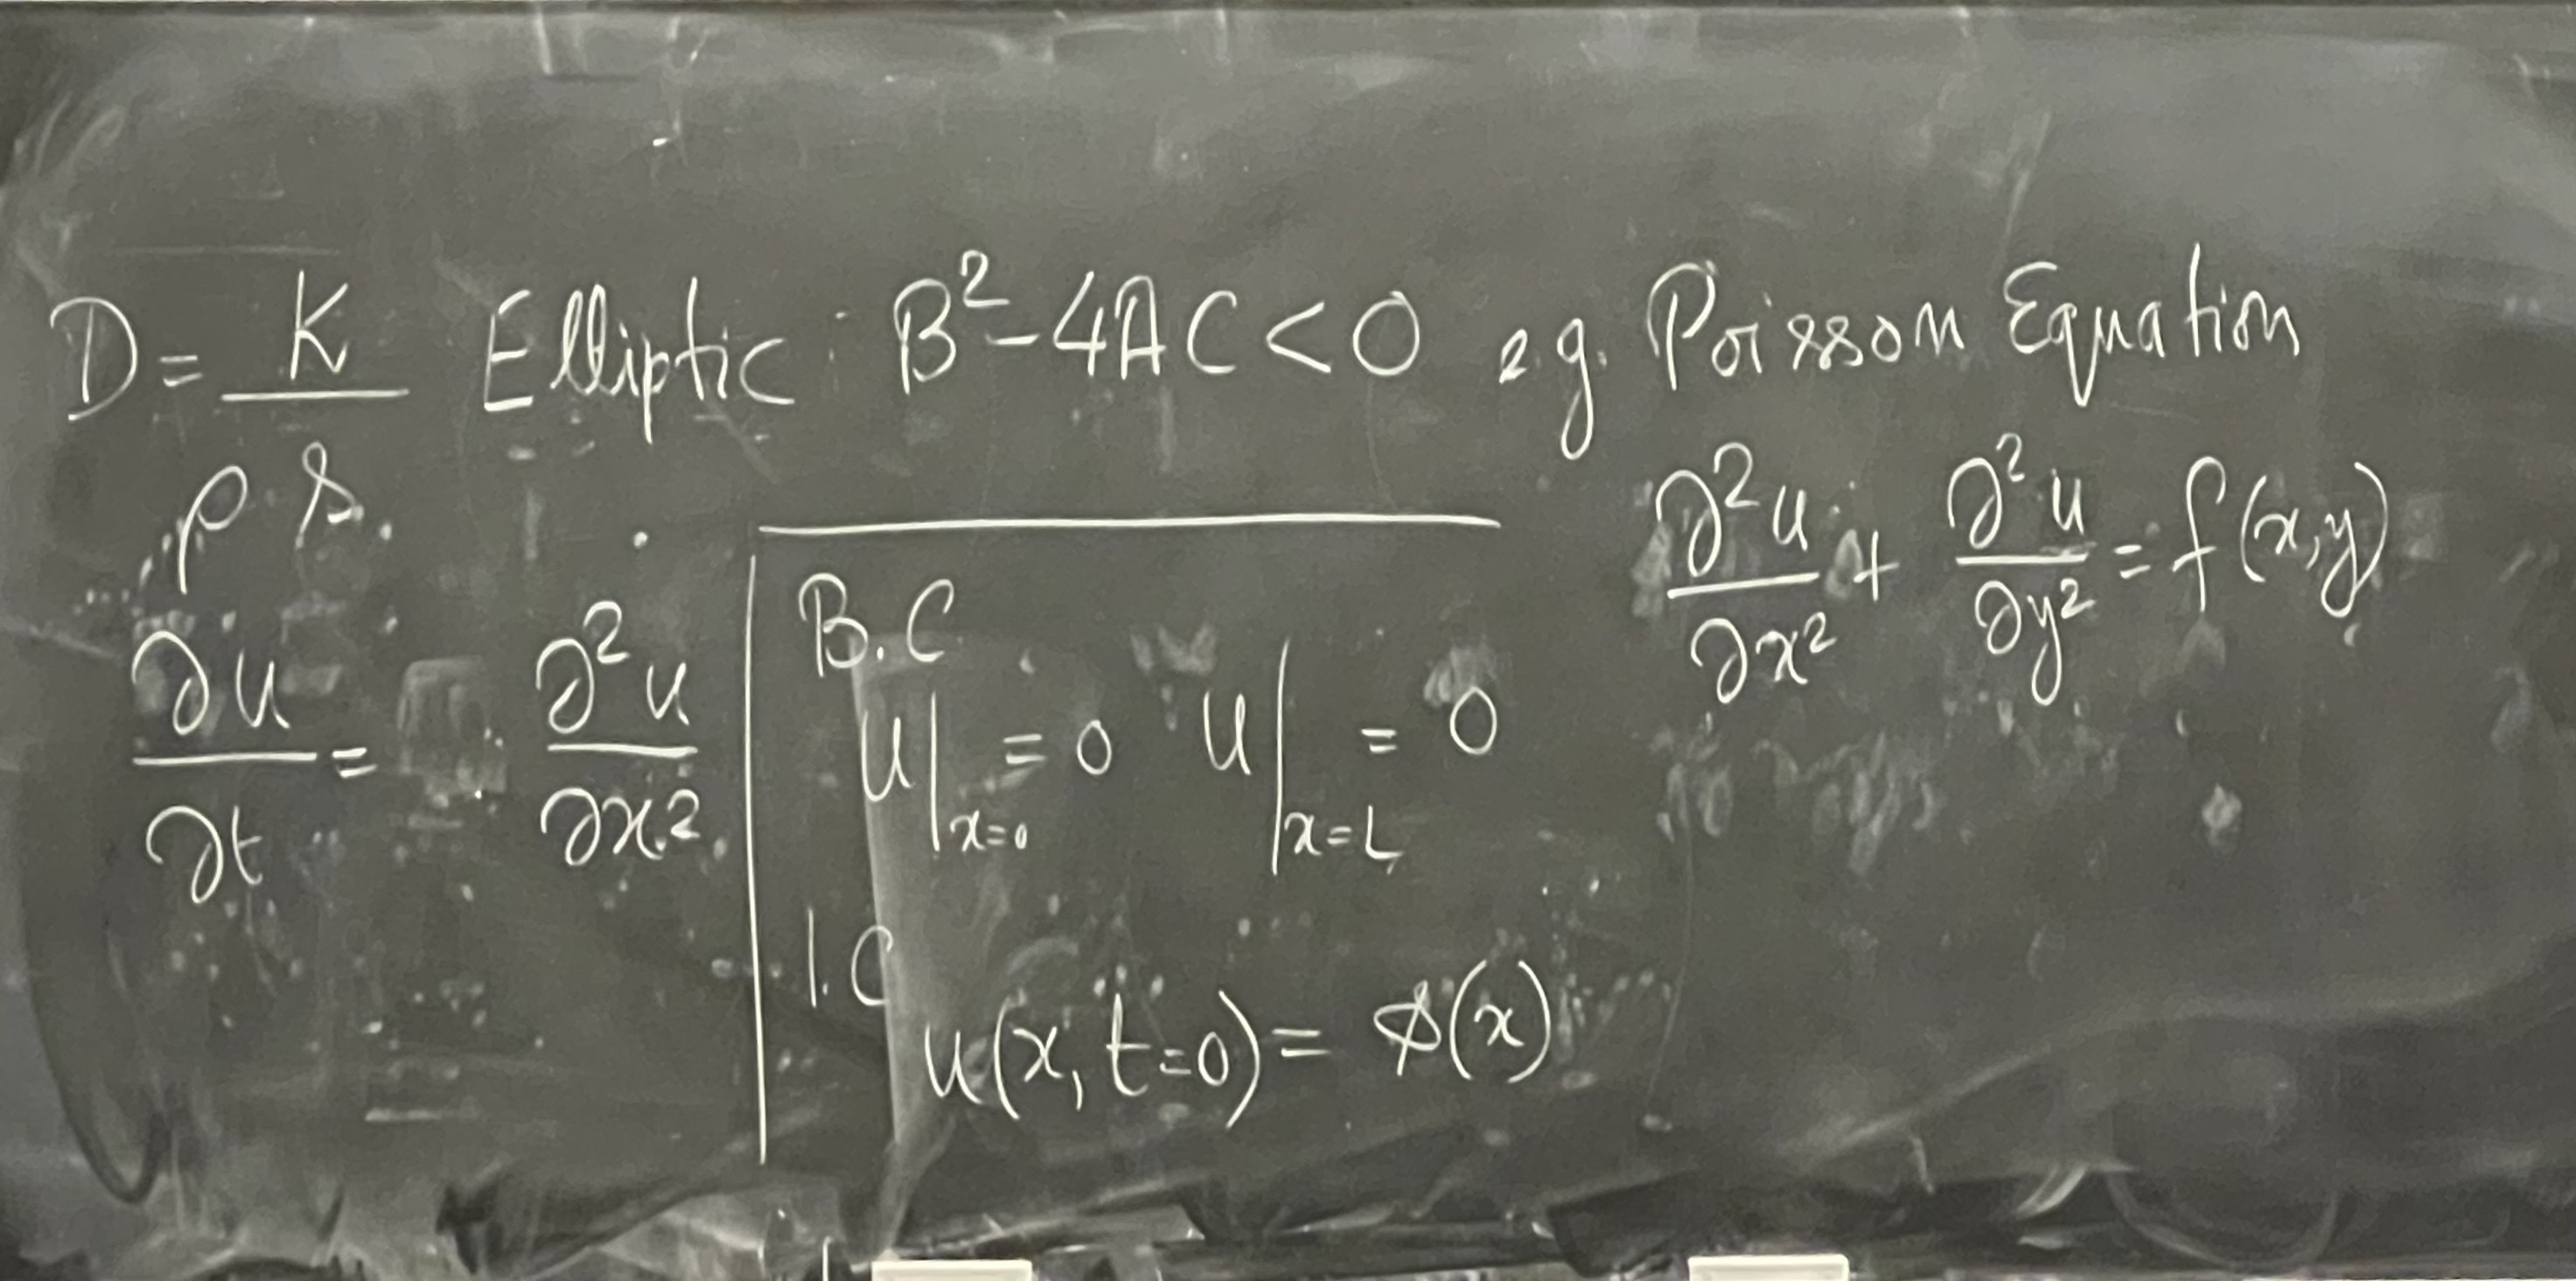

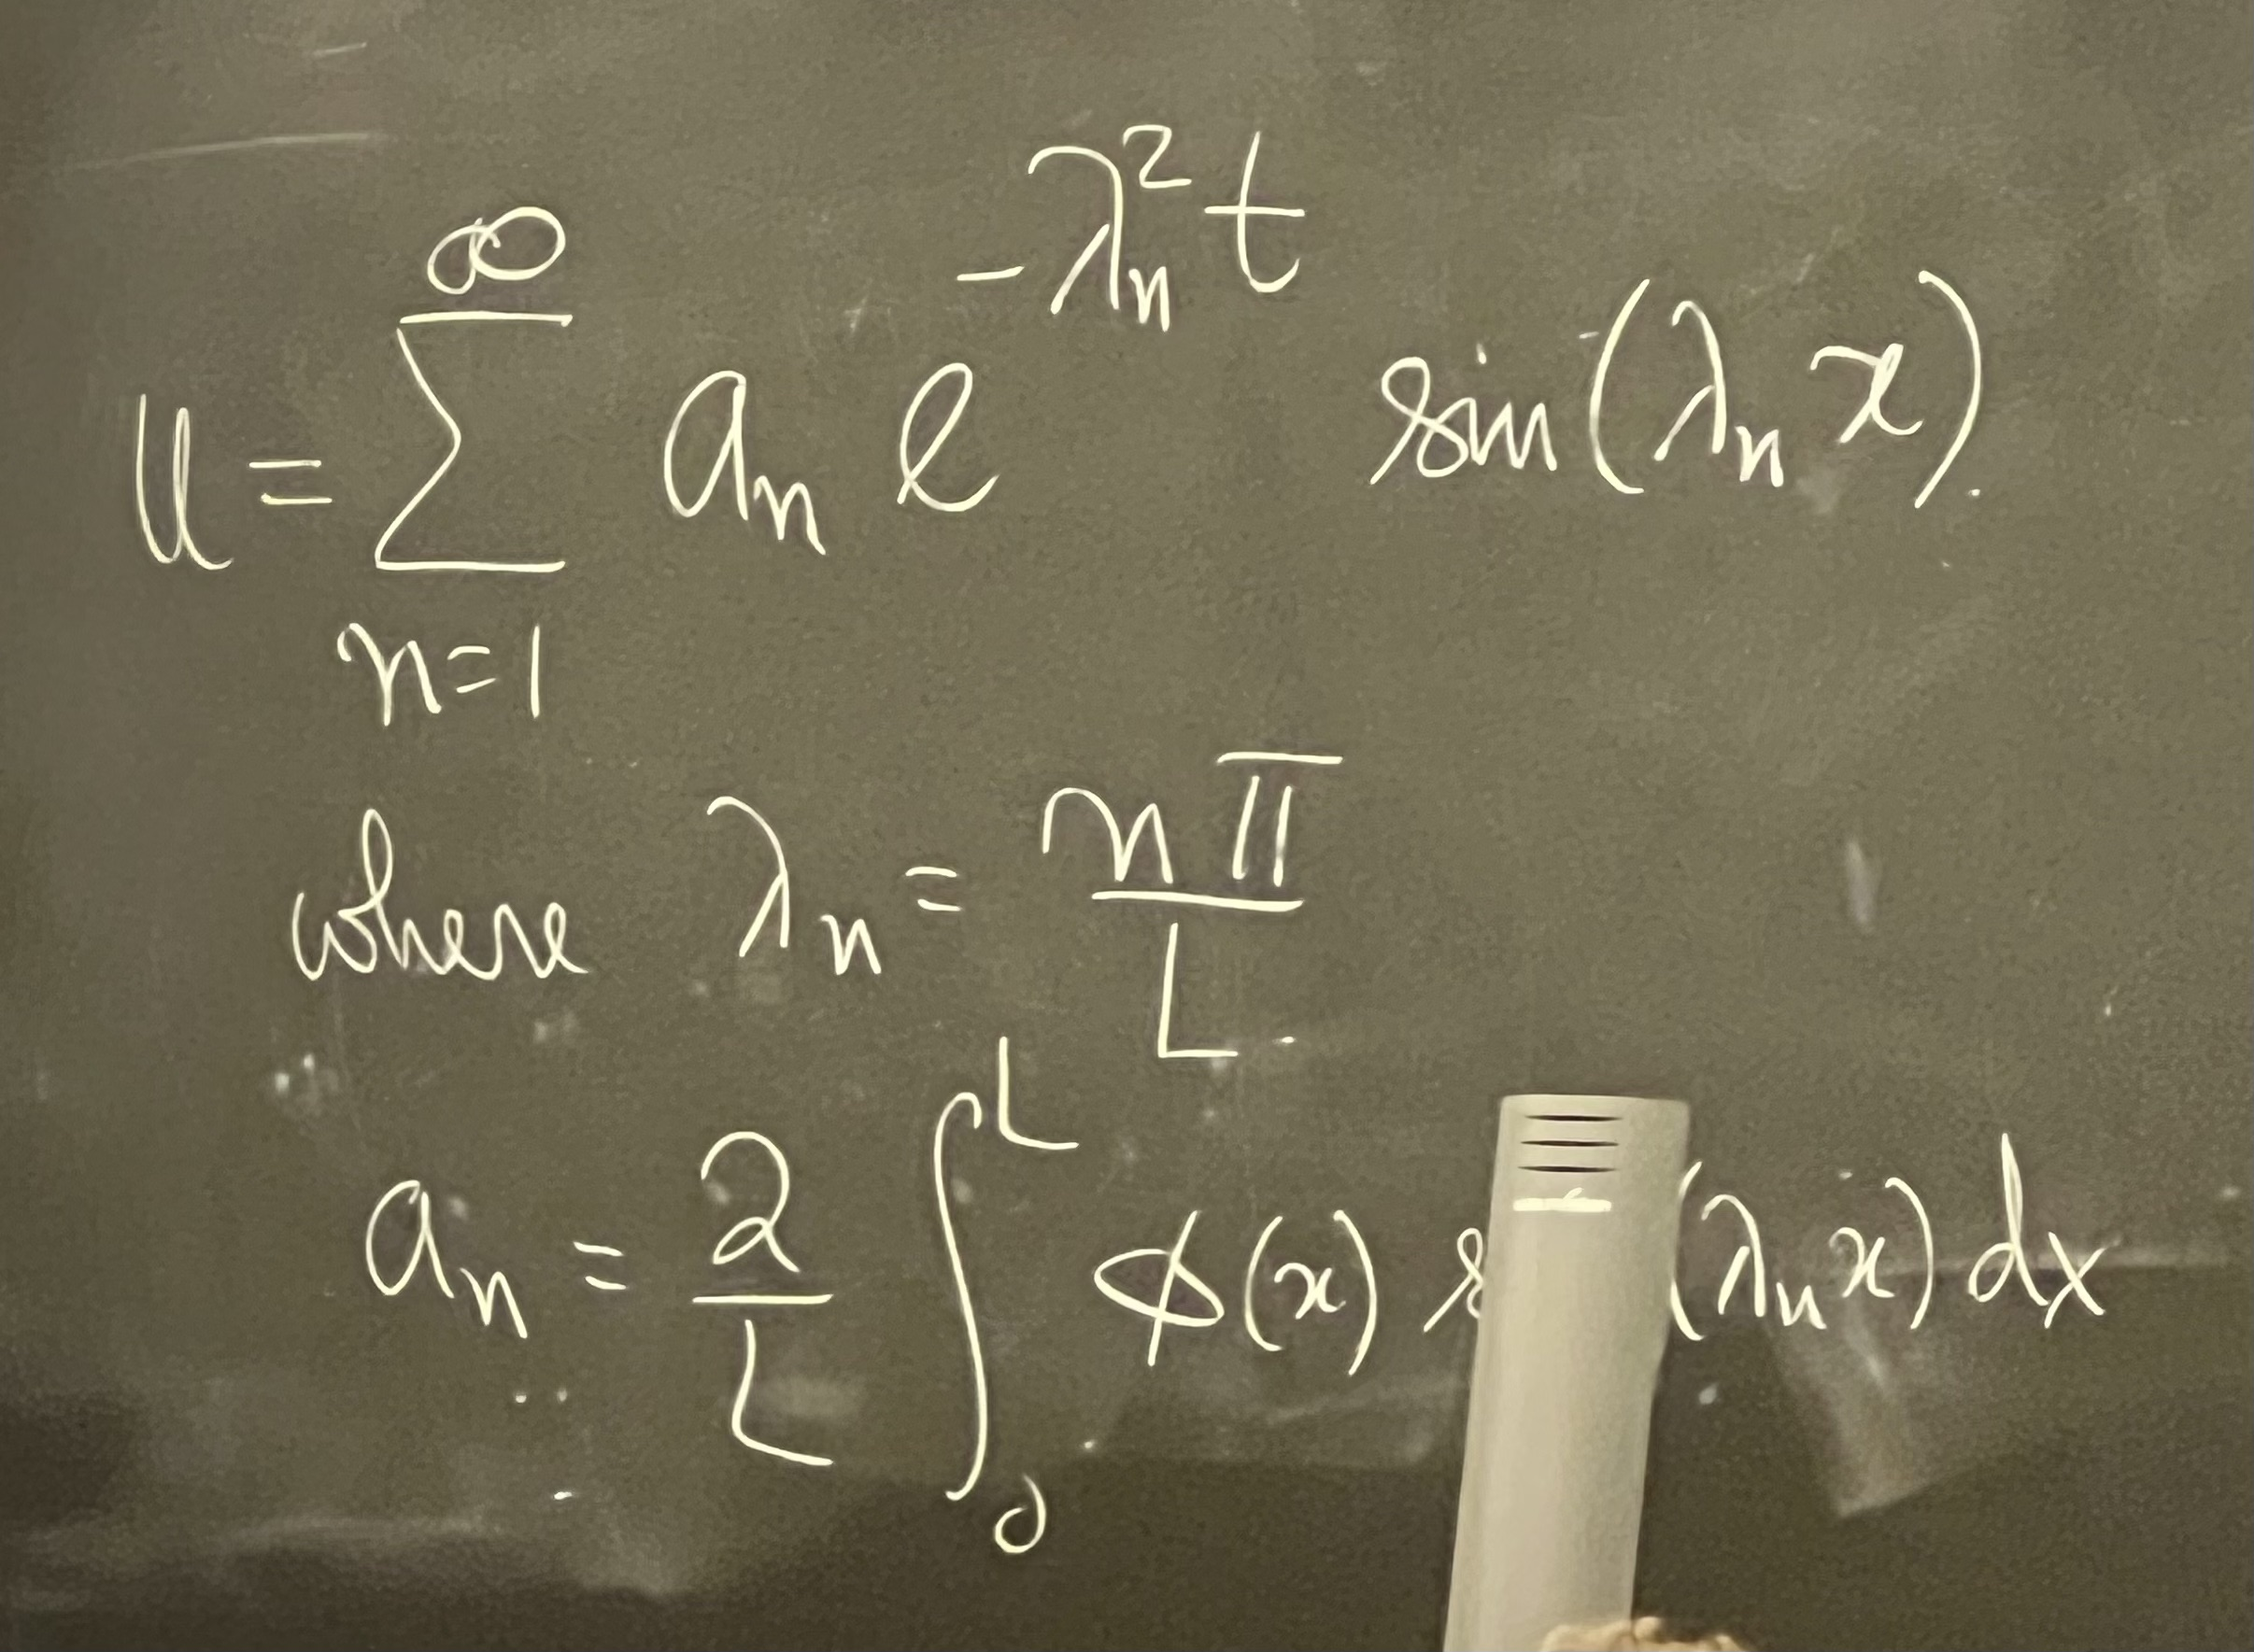

blocked out --> sin

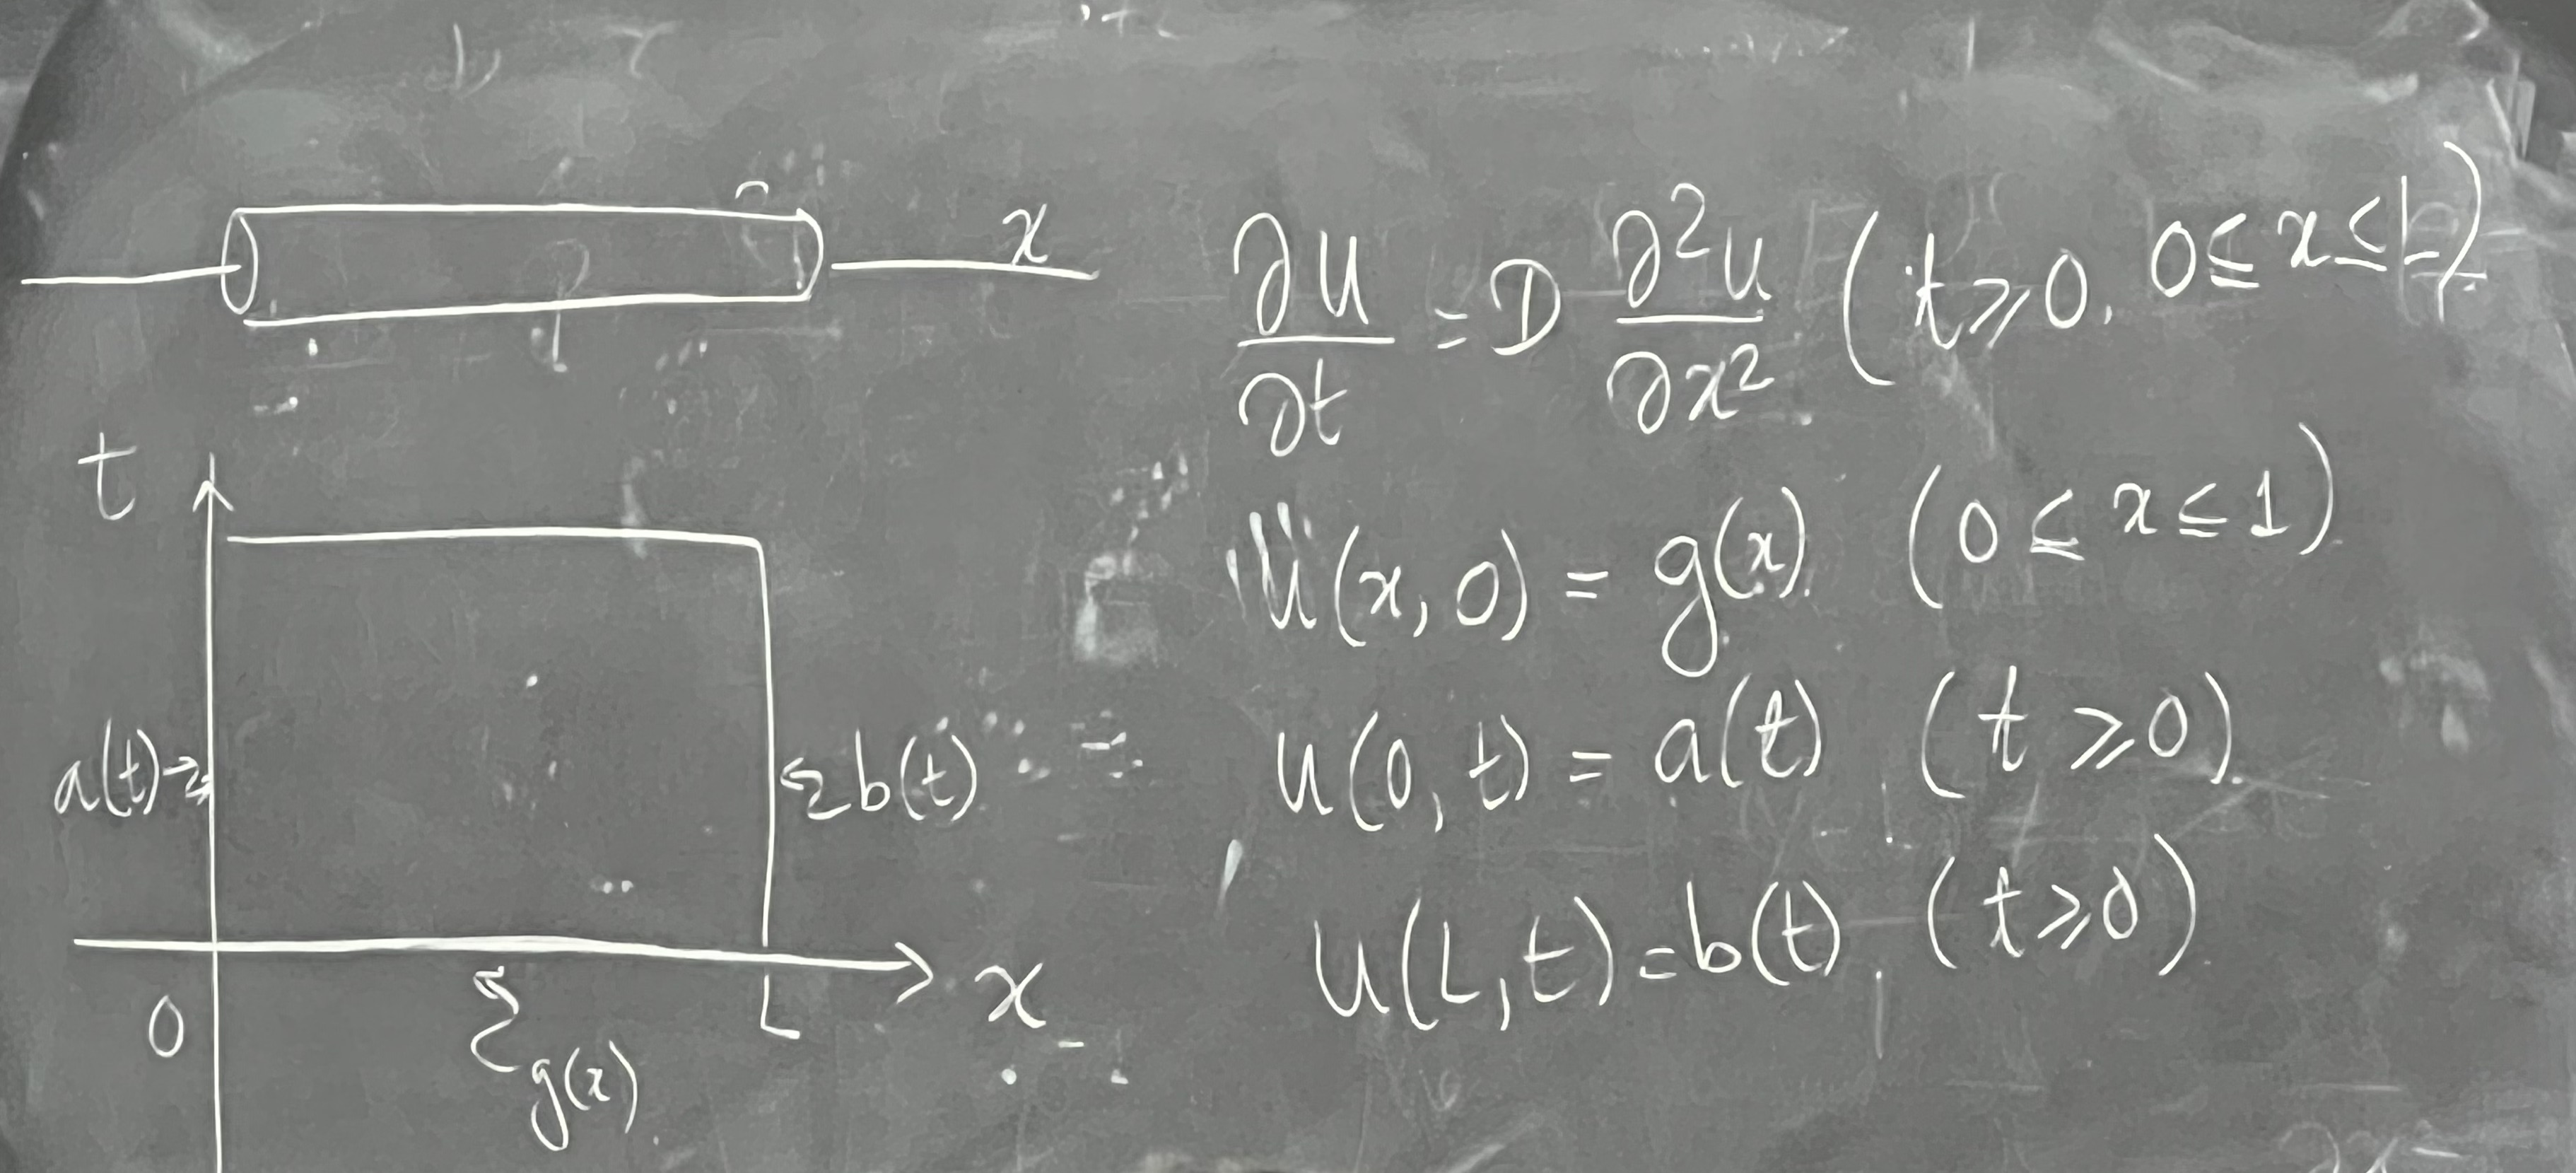

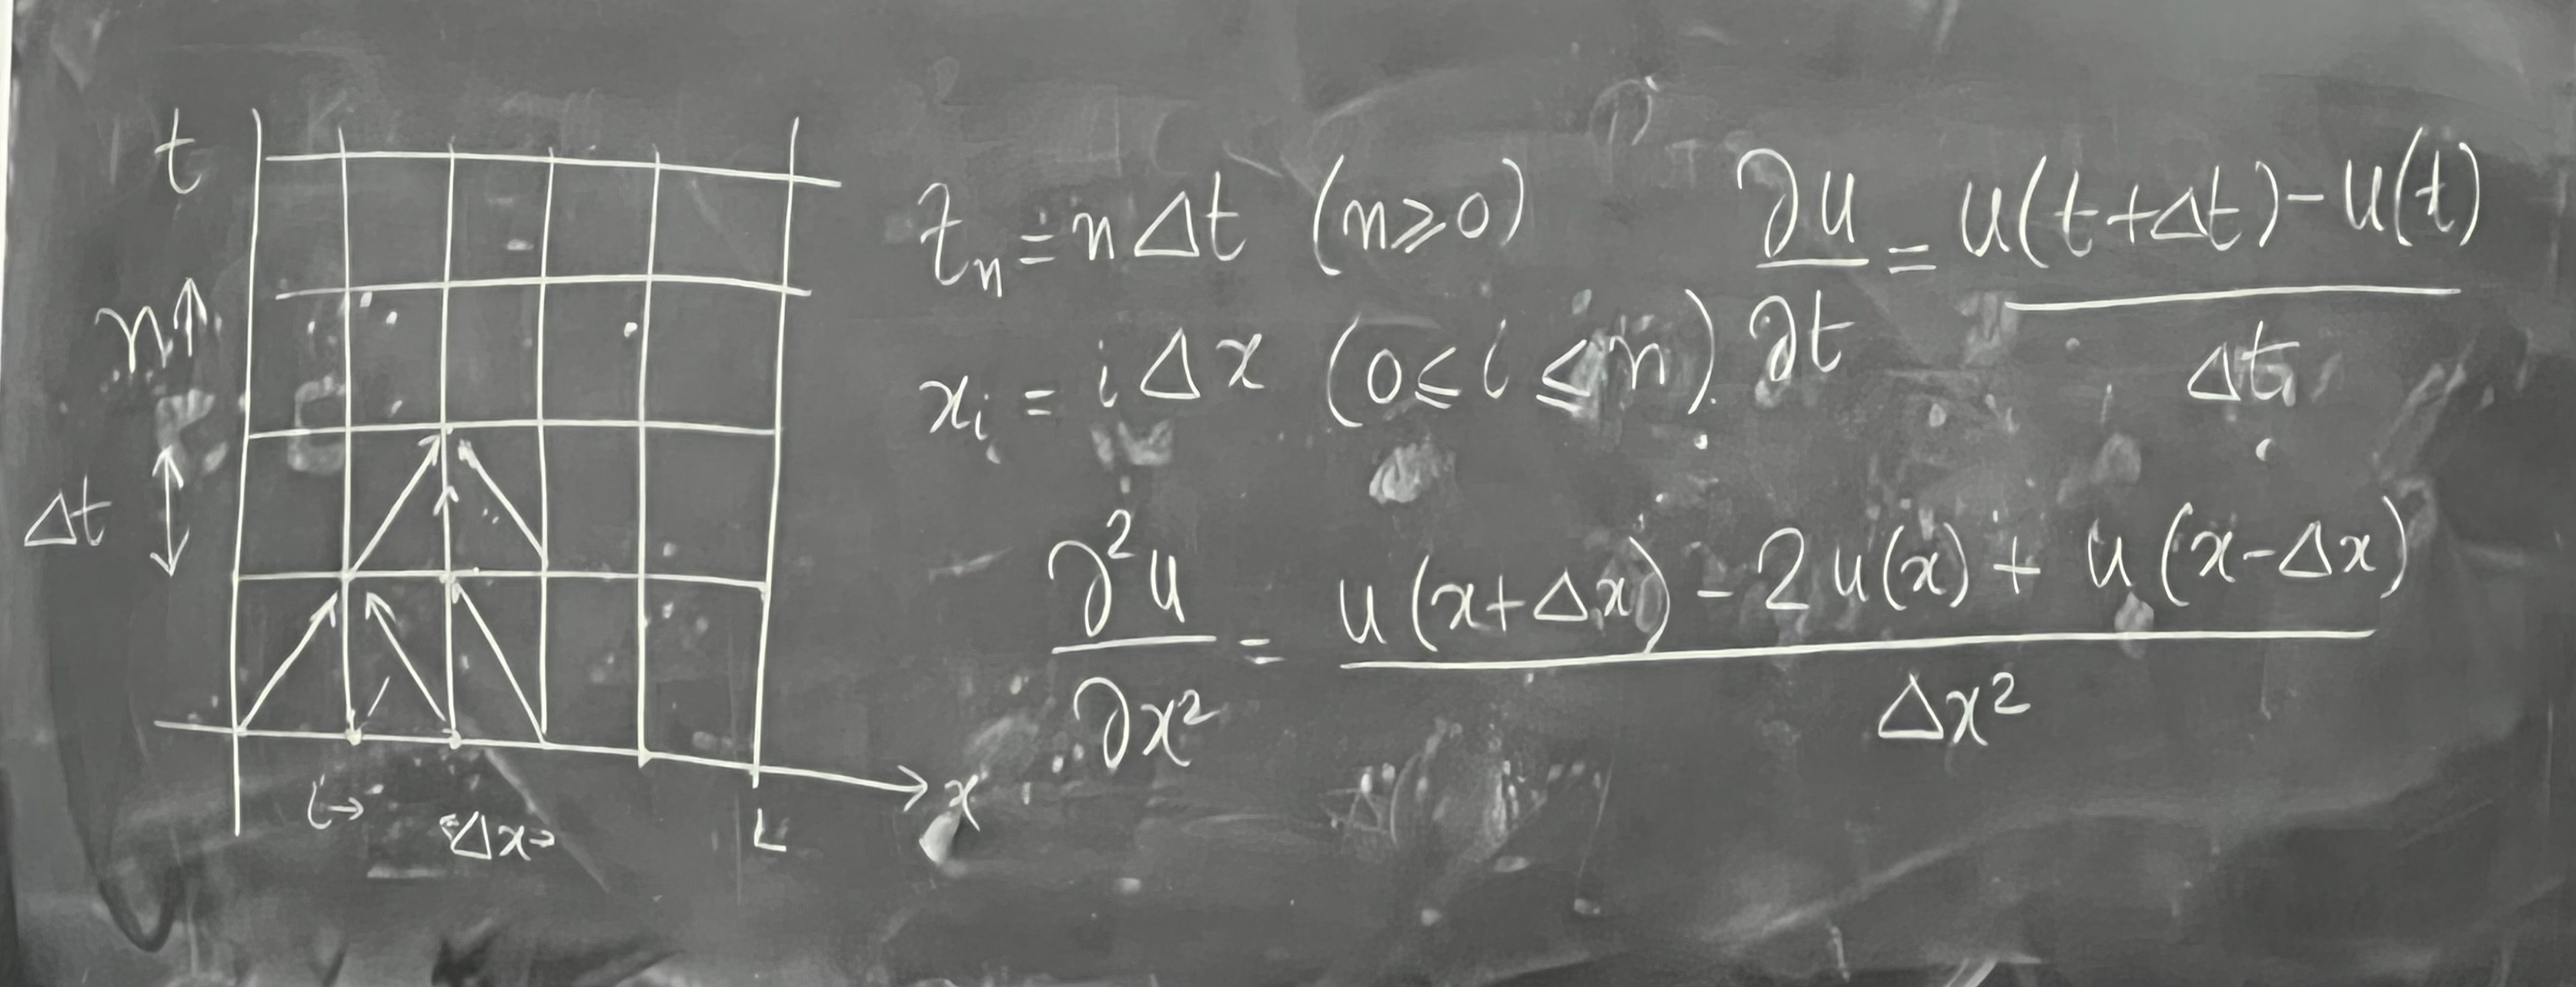

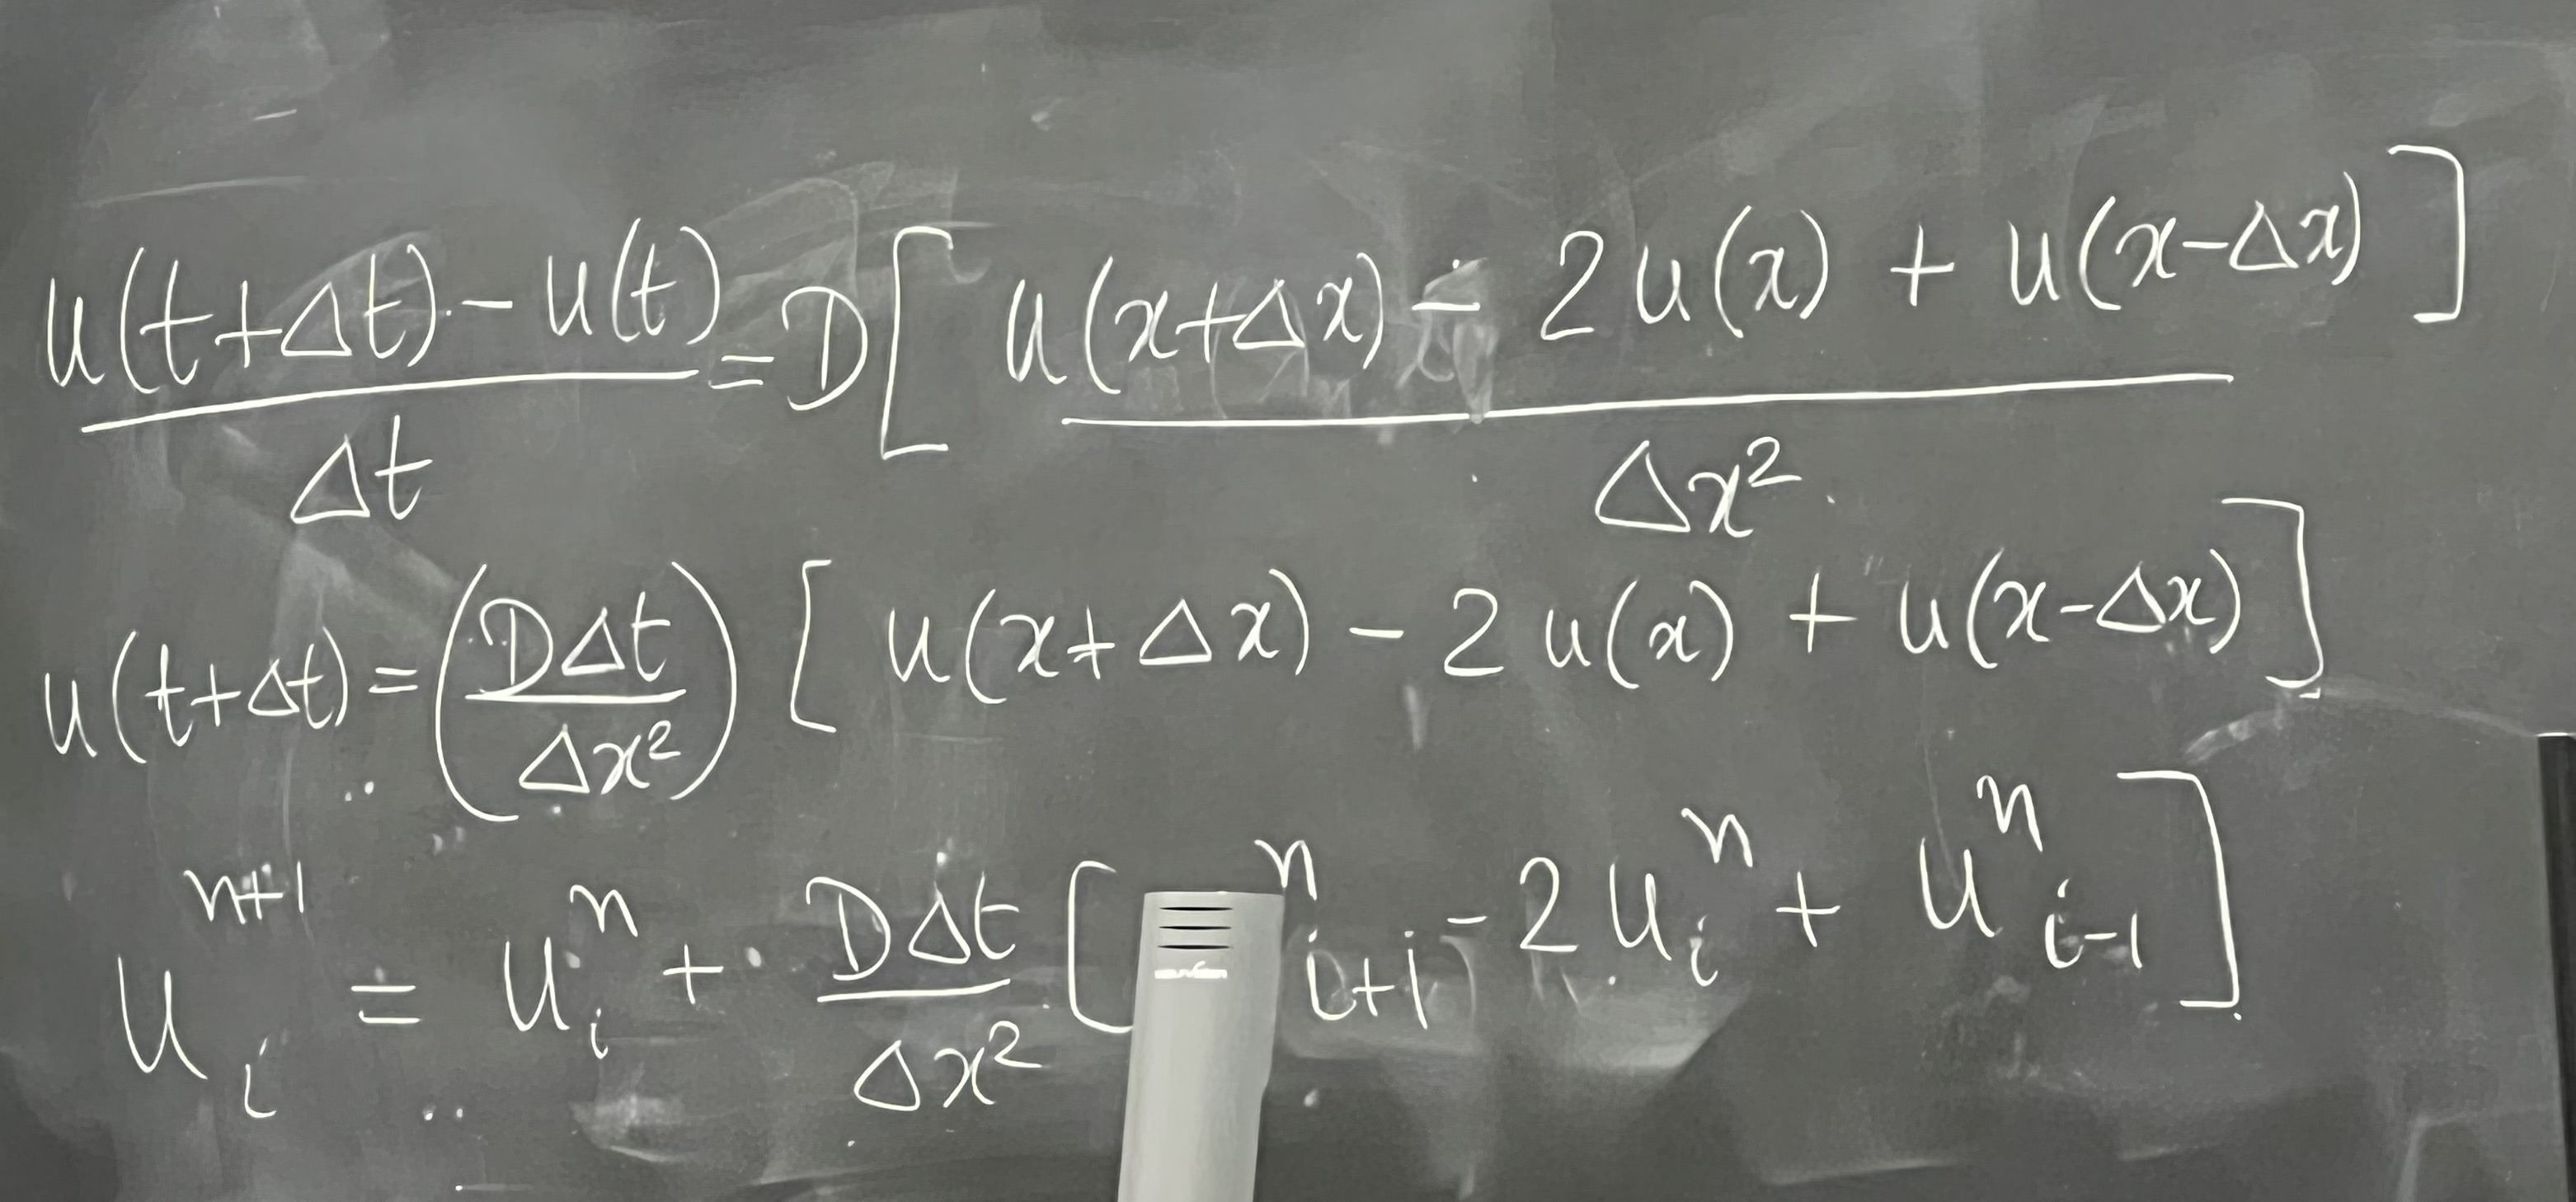

blocked out --> U

Solve the 1-D heat transfer equation using finite-difference method
  u_t = 0.5 * u_xx

  domain x = [0, 1]
  initial condition: u(0, x) = sin (2 * pi * x)
  Dirichlet boundary conditions: u(t, 0) = 0 and u(t, 1) = 0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact
from IPython.display import display

def wrapper (x, u, t):
    def plotter (T):
        # plt.plot (x, u[T, :], 'b') # textbook version
        # plt.plot (x, u[T, x], 'b') # class notes version
        plt.plot (x, u[int(T*10)], 'b')
        plt.grid()
        plt.ylim (-1, 1)
        plt.show()
    interactive_plot = interactive (plotter, T = t)
    display (interactive_plot)

def main():
  # create an array for t starting at t = 0 and ending at t = 1
  # divide this interval into 10 equal parts
    t = np.linspace(0, 1, 10)
    dt = 0.1

  # create an array for x starting at x = 0 and ending at x = 1
  # divide this interval into 10 equal parts
    x = np.linspace(0, 1, 10)
    dx = 0.1

  # define the diffusion coefficient
    D = 0.5

  # define parameter a as
    a = (D * dt) / (dx**2)

  # print the values
    print ("dt = ", dt, ", dx = ", dx, ", a = ", a)

  # build array U to store all approximations at all times and 
  # at all spatial points
    u = np.zeros ((len(t), len(x)))

  # enforce the left boundary condition
    u[:, 0] = 0

  # enforce the right boundary condition
    u[:, -1] = 0

  # enforce the initial condition 
  ## when t = 0
    u[0,:] = np.sin(2*np.pi*x)

  # fill the array U one row at a time, leave the boundary conditions
  # fixed and fill indices 1 through -2
    for n in range (len(t) - 1):
        u[n+1,1:-1] = u[n,1:-1] + a * (u[n,2:] - 2 * u[n,1:-1] + u[n,:-2])

  # plot the solution
    wrapper (x, u, t)

main()

dt =  0.1 , dx =  0.1 , a =  4.999999999999999


interactive(children=(Dropdown(description='T', options=(0.0, 0.1111111111111111, 0.2222222222222222, 0.333333…